In [1]:
### load modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import os
from collections import defaultdict
pd.set_option('display.float_format', lambda x: '%.5f' % x)







In [25]:
### load data
os.chdir("C:/Users/SMA/Desktop/DataScienceSpringboard/Capstone1/santander-product-recommendation")

df =  pd.read_csv("train_ver2.csv",parse_dates=["fecha_dato","fecha_alta"])

C:\Users\SMA\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (5,8,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [26]:
#### translate column names 
df.columns =["Date","id","EmployeeBank","ResidenceCountry","Sex","Age","first_contract_date","new_customer",
             "seniority_time","primary_cust_in_month","last_date_as_primary","cust_type","cust_relation_type",
             "residence_index","foreigner_birth","spouse_with_employee","channel_used","deceased","address_type",
             "province_code","province_name","activity_index","gross_income","customer_segment","Saving_Account",
             "Guarantees","Current_Account","Derivada_Account","Payroll_Account","Junior_Account","MP_Account",
             "P_Accouont","PP_Account","St_deposit","MT_deposit","LT_deposit","e_account","Funds","Mortage",
             "Pensions","Loans","Taxes","Credit_Card","Securities","Home_Account","Payroll","Pension","Direct_Debit"]



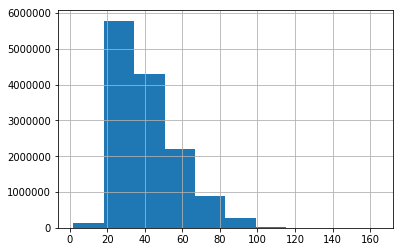

In [35]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13647309 entries, 0 to 13647308
Data columns (total 48 columns):
Date                     datetime64[ns]
id                       int64
EmployeeBank             object
ResidenceCountry         object
Sex                      object
Age                      object
first_contract_date      datetime64[ns]
new_customer             float64
seniority_time           object
primary_cust_in_month    float64
last_date_as_primary     object
cust_type                object
cust_relation_type       object
residence_index          object
foreigner_birth          object
spouse_with_employee     object
channel_used             object
deceased                 object
address_type             float64
province_code            float64
province_name            object
activity_index           float64
gross_income             float64
customer_segment         object
Saving_Account           uint8
Guarantees               uint8
Current_Account          uint8
Der

In [32]:
### reduce size of sparse matrix 
colS = df.loc[:,"Saving_Account":].columns


In [34]:
for k in colS:
    df[k] = pd.to_numeric(df[k],downcast="unsigned")

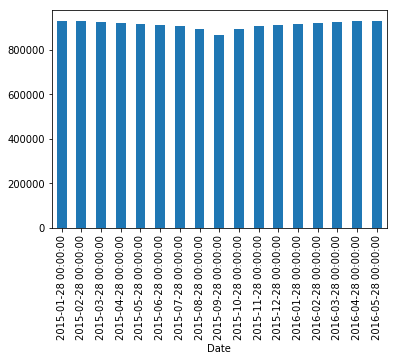

In [36]:
### start first data inspection and cleaning

df.Date.value_counts().plot(kind="bar")

df.id.value_counts().size
df.groupby("Date").id.nunique().plot(kind="bar")


In [37]:
df["EmployeeBank"] = df["EmployeeBank"].astype("category")

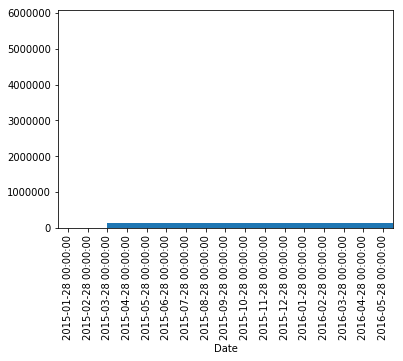

In [38]:
### some features contain mixed data types, i.e. string & float
### cleanStrings function 
def cleanString(x):
    if isinstance(x,int):
        return(x)
    elif isinstance(x,str):
        vor = x.rsplit(" ")
        if "n" in x.lower():
            return(np.nan)
        else:
            return([int(s) for s in vor if s!=""][0])
            



df.ResidenceCountry.value_counts()
df.groupby("Date").ResidenceCountry.nunique()
df["ResidenceCountry"] = df["ResidenceCountry"].astype("category")

df.Sex.value_counts()
df["Sex"].replace({"V":"W","H":"M"},inplace=True)
df.groupby("Date").Sex.value_counts(normalize=True).plot(kind="bar",stacked=True) 
df["Sex"] = df["Sex"].astype("category")


df["Age"] = df["Age"].apply(cleanString)
df.Age.hist()
df.Age.describe()

2754958     W
6015978     M
537467      M
3584456     W
11934040    M
2464338     W
11447961    W
3944742     M
6463949     W
5271757     M
Name: Sex, dtype: category
Categories (2, object): [M, W]

In [40]:
### replace date feature to time differences 
df.first_contract_date.value_counts()
df.first_contract_date.isna().sum()
delta_t = (df.Date  - df.first_contract_date)/np.timedelta64(1,"D")
df["first_contract_date"]= delta_t

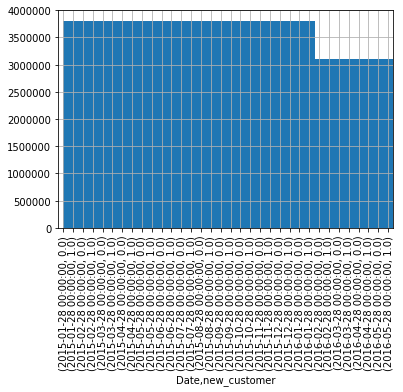

In [41]:

df.new_customer.value_counts(normalize=True)
df.groupby("Date").new_customer.value_counts(normalize=True).plot(kind="bar",stacked=True)
df["new_customer"] = df.new_customer.astype("category")


df["seniority_time"]= df.seniority_time.apply(cleanString)
df["seniority_time"] = df.seniority_time.replace({-999999.0:np.nan})



In [42]:

df.primary_cust_in_month = df.primary_cust_in_month.astype("category")

df.last_date_as_primary

df.cust_type.value_counts()

df["cust_type"] = df.cust_type.replace({"P":5}).astype(float)
df["cust_type"] = df.cust_type.astype("category")

df.cust_relation_type.value_counts()
df["cust_relation_type"] = df["cust_relation_type"].replace({"N":np.nan})
df.groupby("Date").cust_relation_type.value_counts()
df["cust_relation_type"] = df["cust_relation_type"].astype("category")

df["residence_index"].value_counts()
df.residence_index.isna().sum()
df["residence_index"]= df.residence_index.replace({"S":"Y"}).astype("category")

df.foreigner_birth.value_counts()
df["foreigner_birth"] = df.foreigner_birth.replace({"S":"Y"}).astype("category")

df.spouse_with_employee.isna().sum()
df["spouse_with_employee"] = df.spouse_with_employee.replace({"S":"Y"}).astype("category")

df.channel_used.value_counts()
df.channel_used.unique()
df["channel_used"] = df.channel_used.astype("category")

df["deceased"].value_counts()
df["deceased"] = df.deceased.replace({"S":"Y"}).astype("category")

df.address_type.value_counts()
df["address_type"] = df.address_type.astype("category")

df["province_code"].value_counts()

28.00000    4409600
8.00000     1275219
46.00000     682304
41.00000     605164
15.00000     429322
30.00000     396759
29.00000     367023
50.00000     342543
3.00000      313397
11.00000     294684
36.00000     280026
33.00000     265749
47.00000     238259
35.00000     235700
6.00000      192996
48.00000     185888
45.00000     183067
18.00000     178562
37.00000     164238
39.00000     155706
14.00000     144679
10.00000     129912
7.00000      124933
21.00000     122283
13.00000     119390
2.00000      114128
12.00000     104295
43.00000     100115
9.00000       97188
17.00000      90538
31.00000      88618
26.00000      85202
27.00000      84962
32.00000      84009
24.00000      83003
25.00000      79059
20.00000      71567
38.00000      70968
19.00000      64618
23.00000      64363
4.00000       60291
16.00000      57310
49.00000      50927
34.00000      49282
40.00000      42341
22.00000      40181
5.00000       38783
1.00000       37704
44.00000      22525
42.00000      17660


In [43]:

df.province_name.value_counts()
df["province_name"] = df.province_name.astype("category")

df.activity_index.value_counts()
df["activity_index"] = df.activity_index.astype("category")

df["customer_segment"].value_counts()
df["customer_segment"].replace({"02 - PARTICULARES":2,"03 - UNIVERSITARIO":3,"01 - TOP":1},inplace=True)
df["customer_segment"]  = df["customer_segment"].astype("category")
df.gross_income.describe()



count   10852934.00000
mean      134254.31824
std       230620.23882
min         1202.73000
25%        68710.98000
50%       101850.00000
75%       155955.96000
max     28894395.51000
Name: gross_income, dtype: float64

In [45]:
### screen for outliers
out = defaultdict(list)

cols = df.columns[2:19]
for col in cols:
    mcol = df[col]
    if df.dtypes[col] =="float64":
        dev = mcol.mean() + 3*mcol.std()
        ixx_to = np.where(mcol>dev)[0].tolist()
        out[col].extend([len(ixx_to)/len(mcol),ixx_to])
    else: 
        dev = mcol.value_counts(normalize=True)
        ixm = dev[dev< 0.015].index 
        ixx_to = []
        for i in ixm:
            ixx_to.extend(np.where(i==mcol)[0])
        out[col].extend([len(ixx_to)/len(mcol),ixx_to])


nameS = list();values=list()           
for k in out.keys():
    if out[k][0]>0:
        values.append(out[k][0])
        nameS.append(k)
        
outliers = pd.Series(values,index=nameS)




EmployeeBank            0.00063
ResidenceCountry        0.00483
Age                     0.00596
primary_cust_in_month   0.00182
last_date_as_primary    0.00160
cust_type               0.00050
cust_relation_type      0.00040
residence_index         0.00483
spouse_with_employee    0.00000
channel_used            0.13171
deceased                0.00255
dtype: float64

In [47]:
### Age and Gross Income is checked manually
### Age: most people's age is limited and children are not likely to take responsibility over an account 
age = df.Age.copy()
age[age >110]= np.nan
age[age <12]= np.nan
### very unlikely that people are having more than 2.5 million gross income.. 
gI = df.gross_income.copy()
gI[gI>2500000] =  np.nan

df["Age"]=age
df["gross_income"]=gI


In [49]:
### now calculate target values, i.e. sparse matrix of products that will be added the next month

### separate sparse matrix and sort values accoding to client id and Date
### drop unique id entries: there is nothing they will add

sparse = df.loc[:,"Saving_Account":"Direct_Debit"].copy()

sparse["Date"] = df["Date"]
sparse["id"] = df["id"]

su = sparse[sparse.id.duplicated(False)].copy()

su.sort_values(["id","Date"],inplace=True)

su_date_id = su[["Date","id"]]
su.drop(columns= ["Date","id"],inplace=True)




In [50]:
### calculate product migration over whole matrix; therefore identification of last entries along customer ids is necessary
### then simple boolean comparision

last_one = np.where(su_date_id["id"] != su_date_id["id"].shift(-1))[0]

a = su.to_numpy()

ref = su.to_numpy() 
comp = su.shift(-1).to_numpy()

boolS = (ref!= comp) & (comp==1)

new_boolS = np.delete(boolS,last_one,axis=0)

In [52]:
#### give back indices where changes in product basket occurred and transform to sparse matrix output 
x,y = np.where(new_boolS ==True)

s1 = su_date_id["id"].to_numpy()
s1 =np.delete(s1,last_one,axis=0)

s2 = su_date_id["Date"].to_numpy()
s2 = np.delete(s2,last_one,axis=0)

data_sp = {"ids":s1[x],"Dates":s2[x],"values_":y.tolist()}

sp_target = pd.DataFrame(data_sp)

sp_target["ik"]= 1
spx = sp_target.pivot_table(index=["Dates","ids"],columns="values_",values="ik")
spx.fillna(0,inplace=True)



In [59]:
### concatenate sparse target matrix with frame

spx.sort_index(level=[0,1],inplace=True)

spx.columns = df.columns[24:] + "_target"

spx.index.names =["Date","id"]

df.set_index(["Date","id"],inplace=True)
df.sort_index(level=[0,1],inplace=True)

nd = pd.concat([df,spx],axis=1,ignore_index=False)




In [60]:
#### fill Na with zero; i.e. Na result from those who did not have any change in basket and those who were unique
repl = nd.loc[:,"Saving_Account_target":].copy()
repl.fillna(0,inplace=True)
nd.loc[:,"Saving_Account_target":] = repl.to_numpy()



In [61]:
### generate additional features: a) how many products has a client purchased in comparsion to the month before 
### b) how many products has a client sold off before 

first_one = np.where(su_date_id["id"]!= su_date_id["id"].shift(1))[0]
compp = su.shift(1).to_numpy()
boolSN = (ref==1) & (compp != ref)
boolSL = (ref==0) & (compp != ref)
boolSN = np.delete(boolSN,first_one,axis=0)
boolSL = np.delete(boolSL,first_one,axis=0)
s_1 = np.delete(su_date_id["id"].to_numpy(),first_one,axis=0)
s_2 = np.delete(su_date_id["Date"].to_numpy(),first_one,axis=0)
switching = {"id":s_1,"Date":s_2,"new_ones":boolSN.sum(axis=1),"leave_ones":boolSL.sum(axis=1)}
switching = pd.DataFrame(switching)
switching.set_index(["Date","id"],inplace=True)
switching.sort_index(level=[0,1],inplace=True) 





In [62]:
#### merge an fill missings with 0 
nd = pd.concat([nd,switching],axis=1,ignore_index=False)
ndex = nd[["new_ones","leave_ones"]].copy()
ndex.fillna(0,inplace=True)
nd.loc[:,["new_ones","leave_ones"]] = ndex.to_numpy()


In [77]:
### clean up
for i in nd.loc[:,"Saving_Account_target":].columns:
    nd[i] = pd.to_numeric(nd[i],downcast="unsigned")



In [81]:
df = nd.copy()

In [82]:
del(nd)

In [84]:
os.chdir("...")
df.to_pickle("df_targets.pkl")

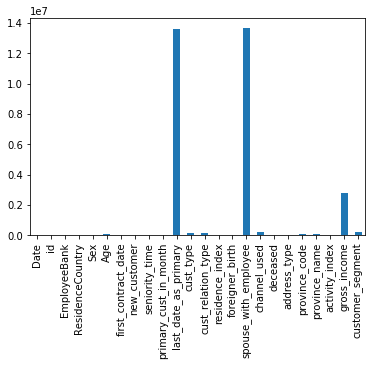

In [48]:
### na statistics & visualization 

